In [146]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [147]:
X_trn = np.loadtxt('data/usps.train', delimiter=',', usecols=(np.arange(1,257)))
y_trn = np.loadtxt('data/usps.train', delimiter=',', usecols=(0))
print(X_trn.shape)
print(y_trn.shape)
X_val = np.loadtxt('data/usps.valid', delimiter=',', usecols=(np.arange(1,257)))
y_val = np.loadtxt('data/usps.valid', delimiter=',', usecols=(0))
print(X_val.shape)
print(y_val.shape)
X_tst = np.loadtxt('data/usps.test', delimiter=',', usecols=(np.arange(1,257)))
y_tst = np.loadtxt('data/usps.test', delimiter=',', usecols=(0))
print(X_tst.shape)
print(y_tst.shape)

(1000, 256)
(1000,)
(300, 256)
(300,)
(300, 256)
(300,)


In [148]:
# Calculate the mean of each feature column
M = mean(X_trn.T, axis=1)

In [149]:
# Standardize/Scale the features
C = X_trn - M

In [150]:
# Find the feature covariance matrix
V = cov(C.T)

In [151]:
# Perform eigen-decomposition of the covariance matrix
eigen_vals, eigen_vecs = eig(V)
# print(eigen_vals)
# print(eigen_vecs)

In [152]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (value, vector) tuples from high to low value
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [153]:
# Find the top 16 eigendigits
vec_dict = {}
i = 0
for p in eigen_pairs[:16]:
    vec_dict[i] = p[1]
    i = i+1
digits = vec_dict.values()

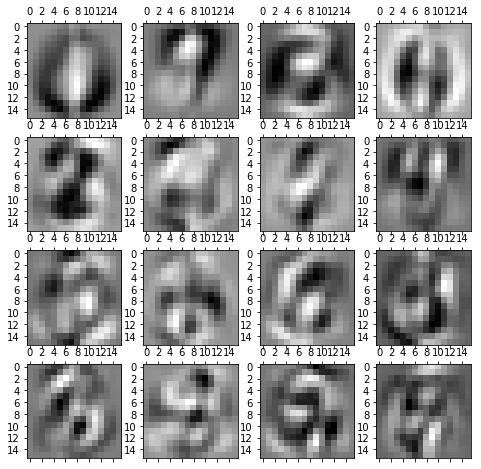

In [154]:
# Visualize the top 16 eigendigits
fig = plt.figure(figsize=(8,8))
i=1
for d in digits:
    ax = fig.add_subplot(4,4,i)
    ax.matshow(d.reshape((16,16)).astype(float))
    i=i+1
plt.show()

In [175]:
# Find cumulative explained variance
total = np.sum(eigen_vals)
cum_exp_var_dict = {}
i = 1
sum = 0
for p in eigen_pairs:
    sum = sum + (p[0]*100/total)
    cum_exp_var_dict[i] = sum
    i = i+1
cv_dict = dict(zip(cum_exp_var_dict.values(),cum_exp_var_dict.keys()))

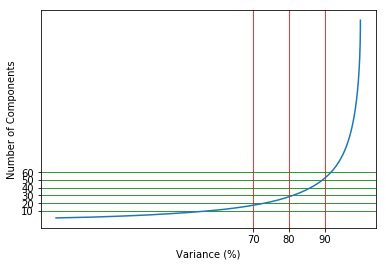

In [223]:
# Plot cumulative explained variance vs number of components plot
plt.figure()
plt.grid(axis='x', color='r')
plt.grid(axis='y', color='g')
plt.plot(cv_dict.keys(), cv_dict.values())
plt.ylabel('Number of Components')
plt.xlabel('Variance (%)')
plt.yticks(np.arange(10, 61, 10))
plt.xticks([70, 80, 90])
plt.show()

To achieve 70%, 80% and 90% of the total variance, the respective approximate dimensionality required are as follows:
* k<sub>70</sub> = ~18 components
* k<sub>80</sub> = ~29 components
* k<sub>80</sub> = ~54 components